In [130]:
import geopandas as gpd
import pandas as pd
import requests
import json
import cartopy.crs as ccrs
import cartopy.feature as feature
import matplotlib.pyplot as plt
import folium
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,15)
%config InlineBackend.figure_format = 'retina'


regions_url = "http://www.nwac.us/static/home/data/regions.json"
forecast_url = "https://www.nwac.us/api/v4/danger_map_data/"

In [110]:
import numpy
numpy.__version__


'1.13.3'

In [111]:
regions_raw = requests.get(regions_url)
regions = gpd.GeoDataFrame.from_features(regions_raw.json()['features'])
regions.set_index('id', inplace=True)
regions.index = pd.to_numeric(regions.index)
regions.head()

,geometry,name,zone_url
id,,,
3,POLYGON ((-121.5366860992391 47.31180036205748...,Snoqualmie Pass,http://nwac.us/avalanche-forecast/current/casc...
2,POLYGON ((-121.0718285858468 47.62663284666024...,Stevens Pass,http://nwac.us/avalanche-forecast/current/casc...
1,POLYGON ((-123.9054285384641 47.80158466790031...,Olympics,http://nwac.us/avalanche-forecast/current/olym...
13,POLYGON ((-122.0105417543309 45.32261810048667...,Mt Hood,http://nwac.us/avalanche-forecast/current/mt-hood
14,POLYGON ((-122.0652301747959 48.69071072773331...,"WA Cascades West, Mt Baker",http://nwac.us/avalanche-forecast/current/casc...


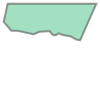

In [112]:
regions.loc[14].geometry

In [113]:
forecast_raw = requests.get(forecast_url, headers={'referer' : "https://www.nwac.us"})
forecast = pd.read_json(forecast_raw.text).T
forecast

,bottom_line_summary,danger_elev_high,danger_elev_low,danger_elev_middle,url,zone_abbreviated_name
1,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/olympics/,Olympics
10,,no-data,no-data,no-data,/avalanche-forecast/current/cascade-east-steve...,Cascade East - Stevens to Snoq
11,,no-data,no-data,no-data,/avalanche-forecast/current/cascade-east-snoqu...,Cascade East - Snoq to White
12,,no-data,no-data,no-data,/avalanche-forecast/current/cascade-east-white...,Cascade East - White Pass S
13,New wind slabs are the primary concern near an...,Considerable,Moderate,Considerable,/avalanche-forecast/current/mt-hood/,Mt Hood
14,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-north...,Cascade West - North
15,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-central/,Cascade West - Central
16,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-south/,Cascade West - South
17,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-east-north/,Cascade East - North
18,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-east-central/,Cascade East - Central


In [114]:
forecast_raw.json()

{'1': {'bottom_line_summary': 'The avalanche danger will continue to slowly decrease Thursday. The uncertainty will be wind transported snow near ridges and newly forming wind slabs on a variety of aspects. Watch for any wind stiffened surface snow and avoid large open slopes of consequence in higher terrain.',
  'danger_elev_high': 'Considerable',
  'danger_elev_low': 'Moderate',
  'danger_elev_middle': 'Moderate',
  'url': '/avalanche-forecast/current/olympics/',
  'zone_abbreviated_name': 'Olympics'},
 '10': {'bottom_line_summary': '',
  'danger_elev_high': 'no-data',
  'danger_elev_low': 'no-data',
  'danger_elev_middle': 'no-data',
  'url': '/avalanche-forecast/current/cascade-east-stevens-to-snoqualmie/',
  'zone_abbreviated_name': 'Cascade East - Stevens to Snoq'},
 '11': {'bottom_line_summary': '',
  'danger_elev_high': 'no-data',
  'danger_elev_low': 'no-data',
  'danger_elev_middle': 'no-data',
  'url': '/avalanche-forecast/current/cascade-east-snoqualmie-to-white-pass/',
  '

In [115]:
joined = regions.join(forecast)
joined.crs = {'init':'epsg:4326'}

In [116]:
#forecast[forecast.danger_elev_high != 'no-data']

In [127]:
joined

,geometry,name,zone_url,bottom_line_summary,danger_elev_high,danger_elev_low,danger_elev_middle,url,zone_abbreviated_name,style
id,,,,,,,,,,
3,POLYGON ((-121.5366860992391 47.31180036205748...,Snoqualmie Pass,http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-snoqu...,Cascade Pass - Snoq. Pass,fill_color: 'red'
2,POLYGON ((-121.0718285858468 47.62663284666024...,Stevens Pass,http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-steve...,Cascade Pass - Stevens Pass,fill_color: 'red'
1,POLYGON ((-123.9054285384641 47.80158466790031...,Olympics,http://nwac.us/avalanche-forecast/current/olym...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/olympics/,Olympics,fill_color: 'red'
13,POLYGON ((-122.0105417543309 45.32261810048667...,Mt Hood,http://nwac.us/avalanche-forecast/current/mt-hood,New wind slabs are the primary concern near an...,Considerable,Moderate,Considerable,/avalanche-forecast/current/mt-hood/,Mt Hood,fill_color: 'red'
14,POLYGON ((-122.0652301747959 48.69071072773331...,"WA Cascades West, Mt Baker",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-north...,Cascade West - North,fill_color: 'red'
15,POLYGON ((-121.9556646799902 47.37587760144187...,"WA Cascades West, Central",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-central/,Cascade West - Central,fill_color: 'red'
17,POLYGON ((-120.7042912217658 48.50285977941148...,"WA Cascades East, North",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-east-north/,Cascade East - North,fill_color: 'red'
16,POLYGON ((-122.0627403612855 47.18769693136883...,"WA Cascades West, South",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-south/,Cascade West - South,fill_color: 'red'
19,POLYGON ((-121.3693565372253 47.26268468979676...,"WA Cascades East, South",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-east-south/,Cascade East - South,fill_color: 'red'


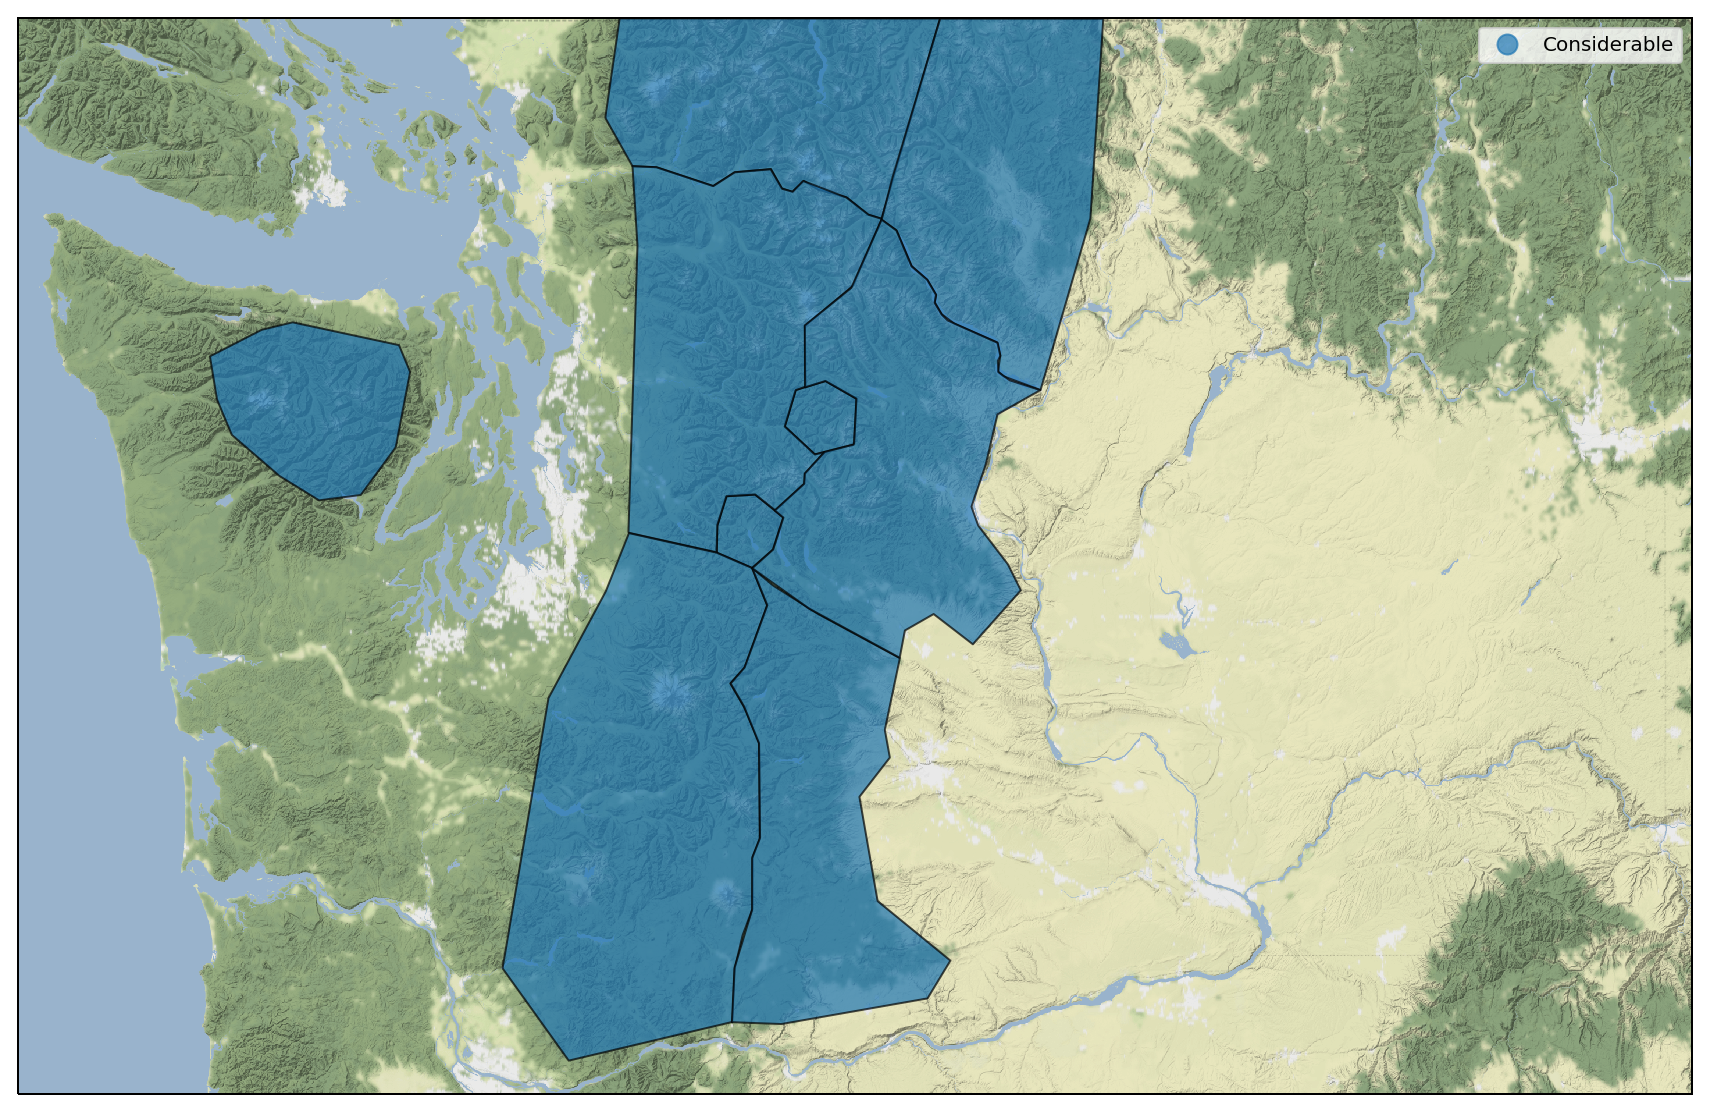

In [118]:
import cartopy.io.img_tiles as cimgt
tiler = cimgt.StamenTerrain()
proj=tiler.crs
ax = plt.axes(projection=proj)
#ax.gridlines()

# ax.add_feature(feature.NaturalEarthFeature(
#         category='cultural',
#         name='admin_1_states_provinces_lines',
#         scale='50m',
#         facecolor='none'))
# ax.coastlines(resolution='10m')
#ax.add_feature(feature.BORDERS)
ax.set_extent([-124.849,-116.9156,49.0024,45.5435])
ax.add_image(tiler,9)
joined.to_crs(proj.proj4_init).plot(column='danger_elev_high', legend=True, ax=ax, alpha=0.7, edgecolor='black')



In [119]:
joined

,geometry,name,zone_url,bottom_line_summary,danger_elev_high,danger_elev_low,danger_elev_middle,url,zone_abbreviated_name
id,,,,,,,,,
3,POLYGON ((-121.5366860992391 47.31180036205748...,Snoqualmie Pass,http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-snoqu...,Cascade Pass - Snoq. Pass
2,POLYGON ((-121.0718285858468 47.62663284666024...,Stevens Pass,http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-steve...,Cascade Pass - Stevens Pass
1,POLYGON ((-123.9054285384641 47.80158466790031...,Olympics,http://nwac.us/avalanche-forecast/current/olym...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/olympics/,Olympics
13,POLYGON ((-122.0105417543309 45.32261810048667...,Mt Hood,http://nwac.us/avalanche-forecast/current/mt-hood,New wind slabs are the primary concern near an...,Considerable,Moderate,Considerable,/avalanche-forecast/current/mt-hood/,Mt Hood
14,POLYGON ((-122.0652301747959 48.69071072773331...,"WA Cascades West, Mt Baker",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-north...,Cascade West - North
15,POLYGON ((-121.9556646799902 47.37587760144187...,"WA Cascades West, Central",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-central/,Cascade West - Central
17,POLYGON ((-120.7042912217658 48.50285977941148...,"WA Cascades East, North",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-east-north/,Cascade East - North
16,POLYGON ((-122.0627403612855 47.18769693136883...,"WA Cascades West, South",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-west-south/,Cascade West - South
19,POLYGON ((-121.3693565372253 47.26268468979676...,"WA Cascades East, South",http://nwac.us/avalanche-forecast/current/casc...,The avalanche danger will continue to slowly d...,Considerable,Moderate,Moderate,/avalanche-forecast/current/cascade-east-south/,Cascade East - South


In [120]:
from IPython.core.display import display, HTML
display(HTML(joined.loc[19].bottom_line_summary))

In [121]:
stamen_terrain = cimgt.GoogleTiles()



In [122]:
def add_choropleth(mapobj, gdf, id_field, value_field, fill_color = 'YlOrRd', fill_opacity = 0.6, 
                    line_opacity = 0.2, num_classes = 5, classifier = 'Fisher_Jenks'):

    
    #Convert the GeoDataFrame to WGS84 coordinate reference system
    gdf_wgs84 = gdf.to_crs({'init': 'epsg:4326'})
    
    #Call Folium choropleth function, specifying the geometry as a the WGS84 dataframe converted to GeoJSON, the data as 
    #the GeoDataFrame, the columns as the user-specified id field and and value field.
    #key_on field refers to the id field within the GeoJSON string
    mapobj.choropleth(geo_data = gdf_wgs84.to_json(), data = gdf,
                columns = [id_field, value_field], key_on = 'feature.properties.{}'.format(id_field),
                fill_color = fill_color, fill_opacity = fill_opacity, line_opacity = line_opacity)
    return mapobj


In [123]:
set(joined.danger_elev_high)

{'Considerable'}

In [124]:
colors = {
    'Low' : 'green',
    'Moderate' : 'yellow',
    "Considerable" : "red", 
    "High" : 'orange',
    "Extreme" : "black"
}
joined['style'] = joined.danger_elev_high.apply(lambda x: "fill_color: '%s'" % colors[x])

In [125]:
m = folium.Map([47.6, -122.0], zoom_start=7, tiles='stamenterrain')
folium.GeoJson(joined).add_to(m)
m
#add_choropleth(m, joined, 'danger_elev_high', 'name')

AttributeError: 'str' object has no attribute 'update'

In [132]:
json.loads(joined.to_json())

{'features': [{'geometry': {'coordinates': [[[-121.5366860992391,
       47.31180036205748],
      [-121.3697754877893, 47.26288901533317],
      [-121.270703569084, 47.32198762724494],
      [-121.2219979209048, 47.42489670355688],
      [-121.3552844573023, 47.49831503799317],
      [-121.4910505697708, 47.49278810594276],
      [-121.5339873067747, 47.39846851965153],
      [-121.5366860992391, 47.31180036205748]]],
    'type': 'Polygon'},
   'id': '3',
   'properties': {'bottom_line_summary': 'The avalanche danger will continue to slowly decrease Thursday. The uncertainty will be wind transported snow near ridges and newly forming wind slabs on a variety of aspects. Watch for any wind stiffened surface snow and avoid large open slopes of consequence in higher terrain. Continue to consider the potential for buried surface hoar or faceted snow below the recent storm snow, due to uncertainty of the distribution or extent of this layer.&nbsp; Caution should still be the watchword over 

{'bottom_line_summary': {1: 'The avalanche danger will continue to slowly decrease Thursday. The uncertainty will be wind transported snow near ridges and newly forming wind slabs on a variety of aspects. Watch for any wind stiffened surface snow and avoid large open slopes of consequence in higher terrain.',
  2: 'The avalanche danger will continue to slowly decrease Thursday. The uncertainty will be wind transported snow near ridges and newly forming wind slabs on a variety of aspects. Watch for any wind stiffened surface snow and avoid large open slopes of consequence in higher terrain. Continue to consider the potential for buried surface hoar or faceted snow below the recent storm snow, due to uncertainty of the distribution or extent of this layer.&nbsp; Caution should still be the watchword over the next days.\r\n\r\nThe storm snow is very deep, there is currently a danger of non-avalanche related snow immersion. Watch your partner at all times!',
  3: 'The avalanche danger will